# Neural Nexus
GDSC Workshop on AI ML <br>
~Jaskaran Singh Walia

# DATASET

1. https://www.kaggle.com/datasets/ahmedmoorsy/facial-expression
2. https://www.kaggle.com/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/data

# Imports

In [9]:
# # Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


You have to download the data and upload it to your drive first before the next block of code

In [3]:
# #Unzipping the file
# !tar -xf /content/drive/My\ Drive/fer2013.tar.gz

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


# Data Pre-processing

In [5]:
# #variables
# num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
# batch_size = 256
# epochs = 100


# with open("fer2013/fer2013.csv") as f:
#   content = f.readlines()

# lines = np.array(content)

# num_of_instances = lines.size
# print("number of instances: ",num_of_instances)
# print("instance length: ",len(lines[1].split(",")[1].split(" ")))

# #------------------------------
# #initialize trainset and test set
# x_train, y_train, x_test, y_test = [], [], [], []

# #------------------------------
# #transfer train and test set data
# for i in range(1,num_of_instances):
#     try:
#         emotion, img, usage = lines[i].split(",")

#         val = img.split(" ")

#         pixels = np.array(val, 'float32')

#         emotion = keras.utils.to_categorical(emotion, num_classes)

#         if 'Training' in usage:
#             y_train.append(emotion)
#             x_train.append(pixels)
#         elif 'PublicTest' in usage:
#             y_test.append(emotion)
#             x_test.append(pixels)
#     except:
#       print("", end="")

# #------------------------------
# #data transformation for train and test sets
# x_train = np.array(x_train, 'float32')
# y_train = np.array(y_train, 'float32')
# x_test = np.array(x_test, 'float32')
# y_test = np.array(y_test, 'float32')

# x_train /= 255 #normalize inputs between [0, 1]
# x_test /= 255

# x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
# x_train = x_train.astype('float32')
# x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
# x_test = x_test.astype('float32')

# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

In [6]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()

    return model
model=my_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       4

In [7]:
#------------------------------
#batch process
# gen = ImageDataGenerator()
# train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=tf.keras.optimizers.Adam()
    , metrics=['accuracy']
)

#------------------------------

In [10]:
fit = False

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
	model.load_weights('/content/drive/MyDrive/model2.h5') #load weights

In [11]:
#Evaluation
# train_score = model.evaluate(x_train, y_train, verbose=0)
# print('Train loss:', train_score[0])
# print('Train accuracy:', 100*train_score[1])

# test_score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', test_score[0])
# print('Test accuracy:', 100*test_score[1])

In [12]:
#------------------------------
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()
#------------------------------


In [13]:
# monitor_testset_results = True

# if monitor_testset_results == True:
# 	#make predictions for test set
# 	predictions = model.predict(x_test)

# 	index = 0
# 	for i in predictions:
# 		if index < 30 and index >= 20:
# 			#print(i) #predicted scores
# 			#print(y_test[index]) #actual scores

# 			testing_img = np.array(x_test[index], 'float32')
# 			testing_img = testing_img.reshape([48, 48]);

# 			plt.gray()
# 			plt.imshow(testing_img)
# 			plt.show()

# 			print(i)

# 			emotion_analysis(i)
# 			print("----------------------------------------------")
# 		index = index + 1

In [14]:
# #Confusion Matrix.

# from sklearn.metrics import classification_report, confusion_matrix

# pred_list = []; actual_list = []

# for i in predictions:

#   pred_list.append(np.argmax(i))

# for i in y_test:

#   actual_list.append(np.argmax(i))

# confusion_matrix(actual_list, pred_list)

In [15]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()

In [16]:
#CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [19]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

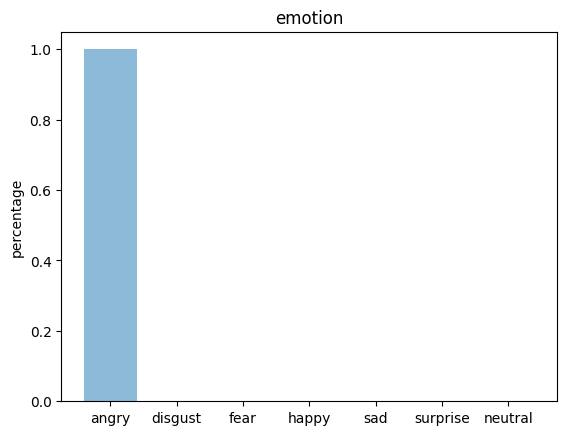

None


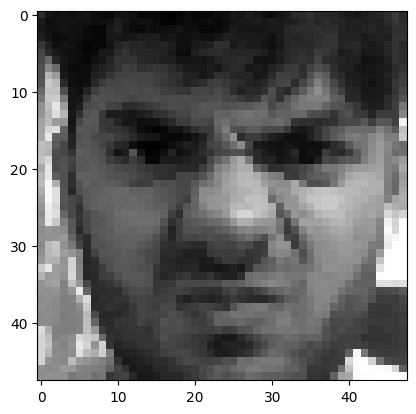

In [20]:
import cv2
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

def crop_face(filepath):
    # Load the Haar Cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Read the image and convert to grayscale
    img = cv2.imread(filepath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        return None

    # Assuming the first face is the target (you might want to change this)
    (x, y, w, h) = faces[0]

    # Crop and resize the face region
    face = gray[y:y+h, x:x+w]
    face = cv2.resize(face, (48, 48))
    return face

# File path
file = 'photo.jpg'

# Crop the face
cropped_face = crop_face(file)

if cropped_face is not None:
    # Prepare the image for the model
    x = np.array(cropped_face, 'float32')
    x = np.expand_dims(x, axis=0)
    x = np.expand_dims(x, axis=-1)
    x /= 255

    # Predict emotion
    custom = model.predict(x)
    emotion_label = emotion_analysis(custom[0])

    print(emotion_label)

    # Display the cropped face
    plt.gray()
    plt.imshow(cropped_face)
    plt.show()
else:
    print("No face detected")
